In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import shapiro

In [2]:
data=pd.read_csv('C:/Users/USER/Desktop/Used_fiat_500_in_Italy_dataset.csv')
data.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790


In [3]:
data.shape

(380, 9)

In [4]:
data.describe()

,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,73.015789,3310.265789,102196.250000,1.510526,44.257712,10.742644,5881.655263
std,9.984672,1437.555063,47115.355234,0.560244,1.767518,2.167753,2170.617946
min,69.000000,91.000000,4981.000000,1.000000,37.510872,7.320720,2890.000000
25%,69.000000,3097.250000,76611.750000,1.000000,43.514196,9.159140,4600.000000
50%,69.000000,3927.000000,112000.000000,1.000000,45.069679,10.301505,5000.000000
75%,69.000000,4322.000000,135000.000000,2.000000,45.556942,12.346788,5500.000000
max,101.000000,4719.000000,259000.000000,4.000000,46.781651,18.168011,15900.000000


C:\Users\USER\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_12796\3582647534.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


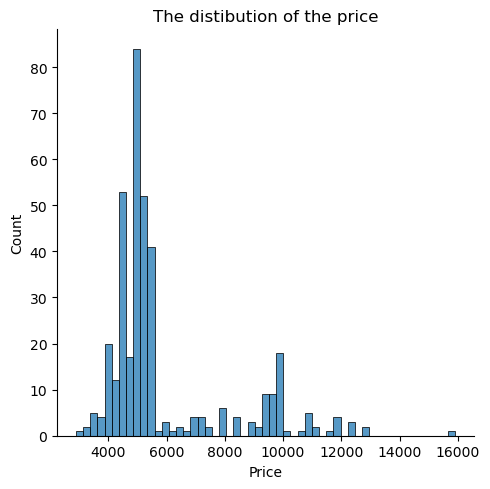

In [7]:
sns.displot(data['price'],kind='hist')
plt.title("The distibution of the price")
plt.xlabel("Price")
plt.tight_layout()
plt.show();

# Stastical Analalysis

In [9]:
#T-test
ttest,pval=ttest_1samp(data['price'],50)
print((ttest,pval))
if pval>0.05:
    print('Null hypothysis reject')
else:
    print('Null hypothsis acepted')

(52.37213175840328, 1.2635448472453706e-175)
Null hypothsis acepted


In [10]:
stats,p_val=shapiro(data['price'])
print((stats,p_val))
if pval>0.05:
    print('Normal Distribution')
else:
    print('Distibution')

(0.74834805727005, 1.2417786097498708e-23)
Distibution


In [11]:
from scipy.stats import normaltest
stats,p_val=normaltest(data['price'])
print((stats,p_val))
if pval>0.05:
    print('Normal Distribution')
else:
    print('Distibution')

(117.3809092550115, 3.243839925805396e-26)
Distibution


# Correlation test

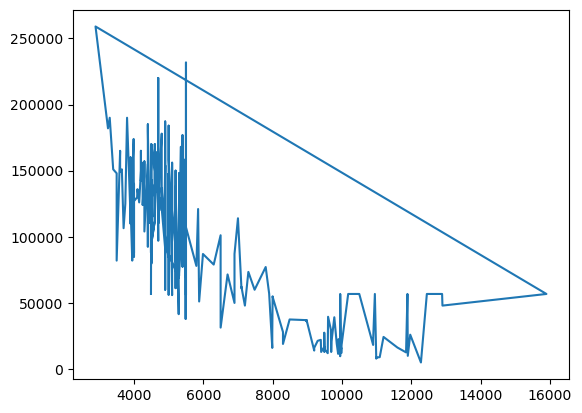

In [12]:
first=data['price']
second=data['km']
plt.plot(first,second)
plt.show()

In [13]:
from scipy.stats import spearmanr
stats,p_val=spearmanr(first,second)
print((stats,p_val))
if pval>0.05:
    print('Independent')
else:
    print('Dependent')

(-0.6584458015231196, 1.3813969201135667e-48)
Dependent


In [14]:
from scipy.stats import pearsonr
stats,p_val=pearsonr(first,second)
print((stats,p_val))
if pval>0.05:
    print('independent')
else:
    print('Dependent')

(-0.7775093599036994, 3.7829020246846543e-78)
Dependent


# Chi SQuared_test

In [16]:
data.columns

Index(['model', 'engine_power', 'transmission', 'age_in_days', 'km',
       'previous_owners', 'lat', 'lon', 'price'],
      dtype='object')

In [17]:
cat=pd.crosstab(data['model'],data['transmission'],margins=False)
cat

transmission,automatic,manual
model,,
lounge,19,193
pop,4,98
sport,2,63
star,0,1


In [18]:
from scipy.stats import chi2_contingency
stats,p_val,dof,excepted=chi2_contingency(cat)
print(stats,p_val)
if p_val>0.05:
    print('independent')
else:
    print('dependent')

4.498683209419012 0.21240777215132325
independent


# Data Exploration

In [20]:
data.columns

Index(['model', 'engine_power', 'transmission', 'age_in_days', 'km',
       'previous_owners', 'lat', 'lon', 'price'],
      dtype='object')

In [21]:
print("The 'model' in the variable: ",end=" ")
print(data['model'].unique())
print("The 'engine_power' in the variable: ",end=" ")
print(data['engine_power'].unique())
print("The 'transmission' in the variable: ",end=" ")
print(data['transmission'].unique())
print("The 'age_in_days' in the variable: ",end=" ")
print(data['age_in_days'].unique())
print("The 'previous_owners' in the variable: ",end=" ")
print(data['previous_owners'].unique())

The 'model' in the variable:  ['pop' 'lounge' 'sport' 'star']
The 'engine_power' in the variable:  [ 69  99 101  84]
The 'transmission' in the variable:  ['manual' 'automatic']
The 'age_in_days' in the variable:  [4474 2708 3470 3288 3712 3684 4353 4414 4322 4566 3500 3197 2251 3774
 4018 2922 2588 2647 3592 2070 1096 2527 1066 2739  762 1886 1431  578
  609 1521  425  397 1127  640  366  456 1370  790  183  701  548  244
  152  275  731  487   91  670 1217 4596 4719 4292 3957 4627 4383 4658
 4077 4169 4535 3804 4200 4230 4108 4139 3623 3927 3835 3865 4049 4443
 2769 3653 3258 3347 3531 3013 4261 3439 3409 3988 3227 3896 3562 4505
 3743 3319 2313 2800 3105 3166 2982 3074]
The 'previous_owners' in the variable:  [2 1 4 3]


In [22]:
categorical=[i for i in data.columns if data[i].dtype =='object']
numerical=[i for i in data.columns if data[i].dtype !='object']

In [24]:
print('There is {} categorical feature in the dataset {}'.format(len(categorical),categorical))
print('There is {} numerical feature in the dataset {}'.format(len(numerical),numerical))

There is 2 categorical feature in the dataset ['model', 'transmission']
There is 7 numerical feature in the dataset ['engine_power', 'age_in_days', 'km', 'previous_owners', 'lat', 'lon', 'price']


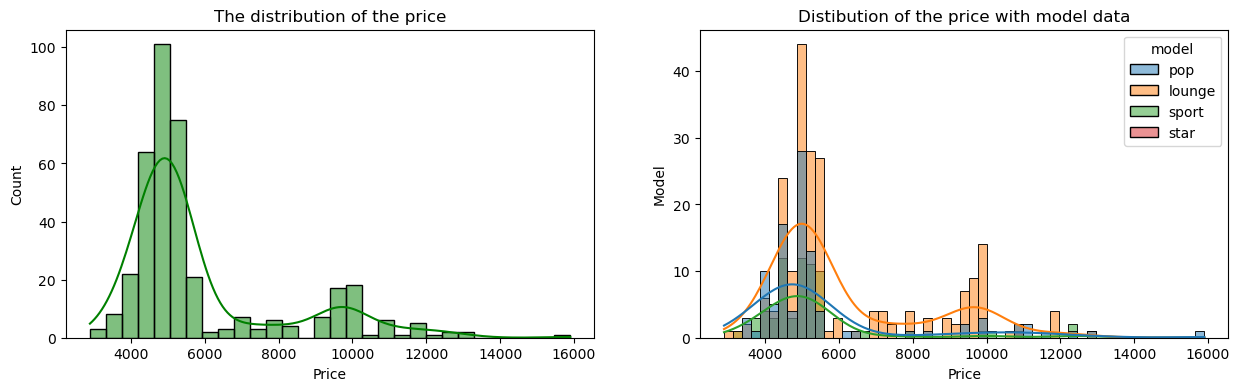

In [25]:
fig,axes=plt.subplots(1,2,figsize=(15,4))
plt.subplot(121)
sns.histplot(data,x='price',kde=True,bins=30,color='g')
plt.title("The distribution of the price")
plt.xlabel("Price")
plt.subplot(122)
sns.histplot(data,x='price',hue='model',kde=True,color='yellow')
plt.title("Distibution of the price with model data")
plt.xlabel("Price")
plt.ylabel("Model")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12796\900924767.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\USER\AppData\Local\Temp\ipykernel_12796\900924767.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\USER\AppData\Local\Temp\ipykernel_12796\900924767.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


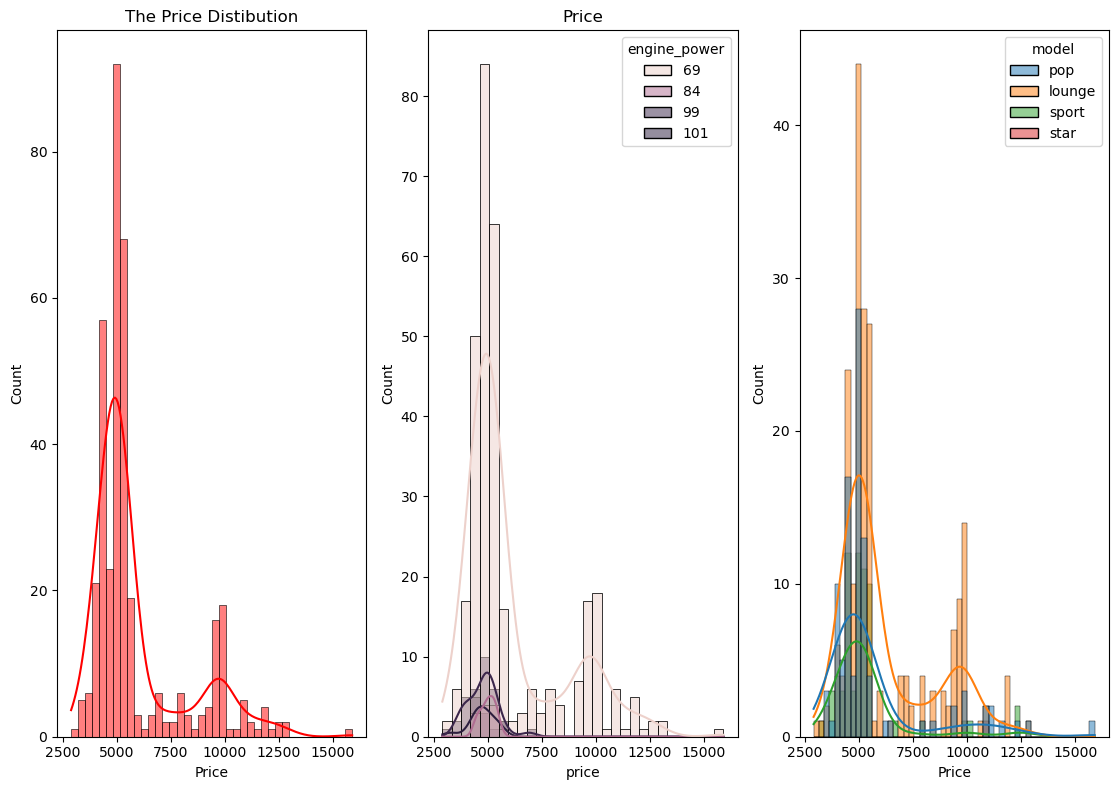

In [26]:
fig,axes=plt.subplots(1,3,figsize=(15,8))
plt.subplot(141)
sns.histplot(data,x='price',kde=True,bins=40,color='r')
plt.title("The Price Distibution")
plt.xlabel("Price")
plt.subplot(142)
sns.histplot(data,x='price',hue='engine_power',kde=True,bins=30,color='yellow')
plt.title("Price")
plt.subplot(143)
sns.histplot(data,x='price',hue='model',kde=True,bins='auto',color='g')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

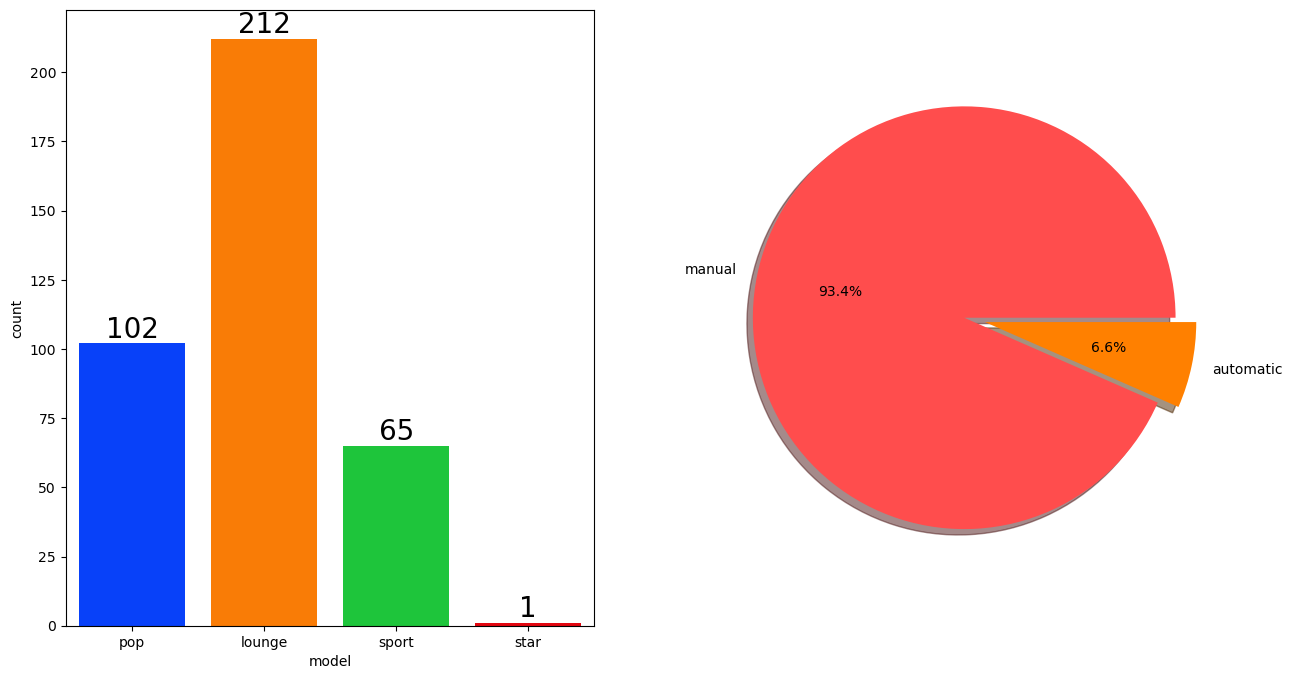

In [27]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=data['model'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=data['transmission'].value_counts(),labels=['manual', 'automatic'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

plt.show()

# MACHINE LEARNING

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,r2_score

In [29]:
X=data.drop(['price'],axis=1)
y=data['price']

In [30]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [31]:
X = preprocessor.fit_transform(X)

In [32]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((304, 12), (76, 12))

In [33]:
def model_predict(test,predict):
    mae=mean_absolute_error(test,predict)
    mse=mean_squared_error(test,predict)
    rmse=np.sqrt(mean_squared_error(test,predict))
    r2_square=r2_score(test,predict)
    return mae,rmse,r2_square

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

model_list = []
r2_list =[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_predict(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_predict(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 855.2026
- Mean Absolute Error: 569.6711
- R2 Score: 0.8397
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 734.8018
- Mean Absolute Error: 559.5526
- R2 Score: 0.8942


Lasso
Model performance for Training set
- Root Mean Squared Error: 855.3265
- Mean Absolute Error: 570.5835
- R2 Score: 0.8397
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 735.2820
- Mean Absolute Error: 560.3874
- R2 Score: 0.8941


Ridge
Model performance for Training set
- Root Mean Squared Error: 855.2539
- Mean Absolute Error: 569.2807
- R2 Score: 0.8397
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 734.2463
- Mean Absolute Error: 559.4649
- R2 Score: 0.8944


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 734.9054
- Mean Absolute Error: 463.4691
- R2 Score: 0.

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.905026
2,Ridge,0.894386
0,Linear Regression,0.894226
1,Lasso,0.894087
3,K-Neighbors Regressor,0.875563
4,Decision Tree,0.812713


In [36]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 89.42


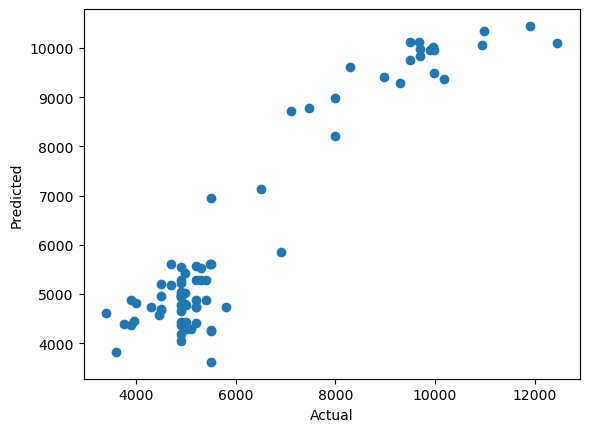

In [37]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

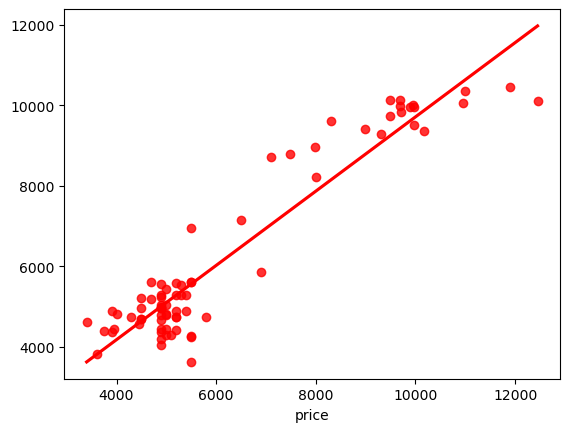

In [38]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [39]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
266,4999,4300.0,699.0
261,4990,5422.0,-432.0
265,4990,4802.0,188.0
39,8980,9402.0,-422.0
33,8299,9611.0,-1312.0
...,...,...,...
316,5200,4740.0,460.0
63,9890,9953.0,-63.0
229,4900,5281.0,-381.0
82,10950,10054.0,896.0
